In [35]:
import os
import csv 
from itertools import zip_longest
import pandas as pd
from matplotlib import pyplot as plt 

writing data into CSV file done!
start plotting


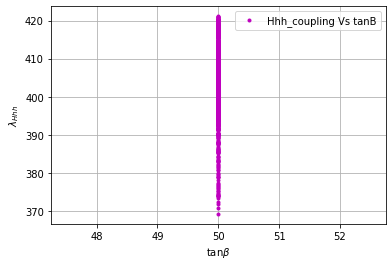

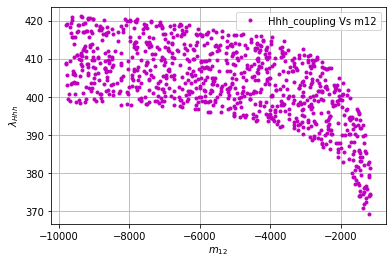

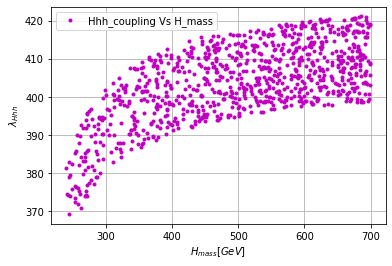

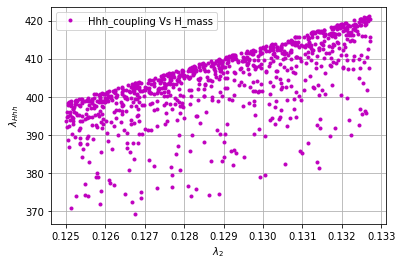

In [37]:
lm1 = []
lm2 = []
lm3 = []
lm4 = []
lm5 = []
m_12 = []
tanb = []
vev_1 = []
vev_2 = []
H_mass = []
Hhh = []


#spc_dir = "/home/aya/programs/toolbox-2.0.3/SSP-1.2.5/Output/Scan3for2HDMtanBL2HBHSwithLandHlatestresultsLHCinclusive1000points"
spc_dir = "/home/aya/programs/toolbox-2.0.3/SSP-1.2.5/Output/Scan3for2HDMM12L2HBHSwithLandHlatestresultsLHCinclusive1000points"

if (os.path.exists(spc_dir)):

    #for i in range(0,827):
    for i in range(0,923):

        spc_file = spc_dir + "/SPheno.spc.THDM_" + str(i)
        
        if (os.path.exists(spc_file)):
            
            with open(spc_file) as spcf:
                
                Lines = spcf.readlines()
                
                # define MINPAR parameters
                
                lambda1 = Lines[37]
                lam1    = float(lambda1[9:23])
                lm1.append(lam1)
                
                lambda2 = Lines[38]
                lam2    = float(lambda2[9:23])
                lm2.append(lam2)
                
                lambda3 = Lines[39]
                lam3    = float(lambda3[9:23])
                lm3.append(lam3)
                
                lambda4 = Lines[40]
                lam4    = float(lambda4[8:23])
                lm4.append(lam4)
                
                lambda5 = Lines[41]
                lam5    = float(lambda5[9:23])
                lm5.append(lam5)
                
                m12input = Lines[42]
                m12      = float(m12input[8:23])
                m_12.append(m12)
                
                tanbeta  = Lines[43]
                tanB     = float(tanbeta[9:23])
                tanb.append(tanB)
                
                Hmass = Lines[158]
                mH = float(Hmass[15:29])
                H_mass.append(mH)
                
                # define vevs of 2 scalar fields
                
                vev1 = Lines[70]
                v1   = float(vev1[8:22])
                vev_1.append(v1)
                
                vev2 = Lines[69]
                v2   = float(vev1[8:22])
                vev_2.append(v2)
                
                # define SCALARMIX rotation matrices parameters
                
                sc11 = Lines[178]
                sc12 = Lines[179]
                sc21 = Lines[180]
                sc22 = Lines[181]
                
                ZH_11 = float(sc11[10:25])
                ZH_12 = float(sc12[10:25])
                ZH_21 = float(sc21[10:25])
                ZH_22 = float(sc22[11:25])
                
                
                # define triple coupling Hhh 
                
                a = ((2*lam3) + (2*lam4) + lam5 + lam5.conjugate()) * ZH_11 * ((v1*ZH_12) + (v2*ZH_11))
                
                b = ZH_12 * ((12*lam2*v2*ZH_12) + (v1 * ( (2*lam3) + (2*lam4) + lam5 + lam5.conjugate() ) * ZH_11))
                
                c = ((2*lam3) + (2*lam4) + lam5 + lam5.conjugate()) * ZH_12 * ((v1*ZH_12) + (v2*ZH_11))
                
                d = ZH_11 * ((12*lam1*v1*ZH_11) + (v2 * ( (2*lam3) + (2*lam4) + lam5 + lam5.conjugate() ) * ZH_12))
                
                
                Hhh_coup = (-2/2) * ( ( ZH_12*(a+b) ) + (ZH_11*(c+d)) )
                
                Hhh.append(Hhh_coup)
                
                #print("Triple Higgs Coupling Hhh for point " + str(i) + " = " + str(Hhh_coup) + " GeV")
                
    
    # check lists size, should be = to nb of scanned points
    
    '''print("size of lambda1 is " + str(len(lm1)))
    print("size of lambda2 is " + str(len(lm2)))
    print("size of lambda3 is " + str(len(lm3)))
    print("size of lambda4 is " + str(len(lm4)))
    print("size of lambda5 is " + str(len(lm5)))
    print("size of m12 is " + str(len(m_12)))
    print("size of tanb is " + str(len(tanb)))
    print("size of Hhh coupling is " + str(len(Hhh)))
    '''  
    
    # save all lists into csv file
    Hhh_csv = "/home/aya/Pheno_Work/analysis/data_plots/newplots/Hhh_coupling.csv"
    
    # define data 
    data = [lm1,lm2,lm3,lm4,lm5,m_12,tanb,H_mass,vev_1,vev_2,Hhh]
    
    export_data = zip_longest(*data, fillvalue = '')
    
    with open(Hhh_csv, 'w') as csvf:
        
        write_file = csv.writer(csvf)
        write_file.writerow(("lm1","lm2","lm3","lm4","lm5","m_12","tanb","H_mass","vev_1","vev_2","Hhh"))  
        write_file.writerows(export_data)
        
    print("writing data into CSV file done!")
    print("start plotting")
    
    ###################
    # START PLOTTING  #
    ###################
    
    data_file = pd.read_csv(Hhh_csv)
    
    plots = "/home/aya/Pheno_Work/analysis/data_plots/newplots"
    
    # coupling Vs tanB
    cHhh_tanB = data_file.plot(x = "tanb", y = "Hhh", marker = '.', color = 'm', label = 'Hhh_coupling Vs tanB', linestyle = '')
    plt.xlabel(r'$\tan \beta$')
    plt.ylabel(r'$\lambda _{Hhh}$')
    plt.grid(True)
    plt.savefig( plots + '/Hhh_coupling_Vs_tanB.png')
    
    
    # coupling Vs m12 
    cHhh_m12 = data_file.plot(x = "m_12", y = "Hhh", marker = '.', color = 'm', label = "Hhh_coupling Vs m12", linestyle='')
    plt.xlabel(r'$m_{12}$')
    plt.ylabel(r'$\lambda _{Hhh}$')
    plt.grid(True)
    plt.savefig( plots + '/Hhh_coupling_Vs_m12.png')
    
    
    # coupling Vs H mass 
    cHhh_mH = data_file.plot(x = "H_mass", y = "Hhh", marker = '.', color = 'm', label = "Hhh_coupling Vs H_mass", linestyle = '')
    plt.xlabel(r'$H_{mass} [GeV]$')
    plt.ylabel(r'$\lambda _{Hhh}$')
    plt.grid(True)
    plt.savefig( plots + '/Hhh_coupling_Vs_Hmass.png')
    
    
    # coupling Vs lambda2
    cHhh_lam2 = data_file.plot(x = "lm2", y = "Hhh", marker = '.', color = 'm', label = "Hhh_coupling Vs H_mass", linestyle = '')
    plt.xlabel(r'$\lambda _{2}$')
    plt.ylabel(r'$\lambda _{Hhh}$')
    plt.grid(True)
    plt.savefig( plots + '/Hhh_coupling_Vs_lambda2.png')
        
        